<a href="https://colab.research.google.com/github/jaewon-huh/DA_DS_dreamtree/blob/main/%EA%B3%B5%EA%B3%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%83%81%EA%B6%8C_%EC%9D%98%EB%A3%8C%EA%B8%B0%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.

## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline 

## 시각화를 위한 폰트 설정

In [27]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 68 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
plt.rc('font',family='NanumBarunGothic')
# Mac 의 한글 폰트 설정
#plt.rc('font', family='AppleGothic') 
#plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 로드하기


: csv 파일의 한글 utf-8이라서 오류 , encoding ='CP949' 인자 추가 

In [4]:
df= pd.read_csv('/content/drive/MyDrive/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', encoding = 'CP949')


## 데이터 미리보기

In [5]:
df.shape 

(91335, 39)

: 총 91335 레코드 , 39개의 변수 

In [6]:
df.head()


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.130000e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1.170000e+24,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4.140000e+24,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2.650000e+24,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4.150000e+24,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

* 상권 분류명 & 분류 코드 (대,중,소) / 시도 코드 & 시도명 / 시군구코드 & 시군구명  ... 

In [8]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [9]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

In [10]:
# 누락 데이터 
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

In [11]:
# 누락 데이터를 df로 
df_null_count = pd.DataFrame(df.isnull().sum())
df_null_count

,0
상가업소번호,0
상호명,0
지점명,89989
상권업종대분류코드,0
상권업종대분류명,0
상권업종중분류코드,0
상권업종중분류명,0
상권업종소분류코드,0
상권업종소분류명,0
표준산업분류코드,4922


In [12]:
df_null = df_null_count.reset_index()
df_null.sort_values(by  =0, ascending =False)

,index,0
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75898
35,층정보,47346
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [13]:
df.duplicated().sum()

0

### 특정 컬럼만 불러오기  
: 결측치가 많은 상위 9 컬럼은 제외함

In [14]:
df_null_head = df_null.sort_values(by  =0, ascending =False).head(9)
df_null_head

,index,0
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75898
35,층정보,47346
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922


In [15]:
# 제외할 칼럼의 리스트 
drop_columns = df_null_head['index'].values 
drop_columns 

array(['지점명', '동정보', '건물부번지', '호정보', '층정보', '건물명', '지번부번지', '표준산업분류코드',
       '표준산업분류명'], dtype=object)

In [16]:
# 열삭제 
print(df.shape)
df = df.drop(columns=drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 30)


In [17]:
 df.isnull().sum()

상가업소번호         0
상호명            0
상권업종대분류코드      0
상권업종대분류명       0
상권업종중분류코드      0
상권업종중분류명       0
상권업종소분류코드      0
상권업종소분류명       0
시도코드         379
시도명          379
시군구코드        379
시군구명         379
행정동코드          0
행정동명         379
법정동코드         55
법정동명          55
지번코드           0
대지구분코드         0
대지구분명          0
지번본번지          0
지번주소           0
도로명코드          0
도로명            0
건물본번지          0
건물관리번호         0
도로명주소          0
구우편번호         12
신우편번호          2
경도             0
위도             0
dtype: int64

### 기초 통계값 보기

In [18]:
df[['위도','경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084551
75%,37.507463,128.108919
max,38.499659,130.909912


: 위도 , 경도 -> 지도 데이터 folium시 , 주로 분포되어있는 곳이 어딘지를 확인 

In [19]:
#  산술데이터 포함 x 
df.describe(include= 'all')

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
count,9.133500e+04,91335,91335,91335,91335,91335,91335,91335,90956.000000,90956,...,91335,9.133500e+04,91335,91335.000000,9.133500e+04,91335,91323.000000,91333.00000,91335.000000,91335.000000
unique,NaN,56908,1,1,5,5,34,34,NaN,17,...,53118,NaN,16610,NaN,NaN,54031,NaN,NaN,NaN,NaN
top,NaN,리원,S,의료,S01,병원,S02A01,약국,NaN,경기도,...,서울특별시 동대문구 제기동 965-1,NaN,서울특별시 강남구 강남대로,NaN,NaN,서울특별시 동대문구 약령중앙로8길 10,NaN,NaN,NaN,NaN
freq,NaN,152,91335,91335,60774,60774,18964,18964,NaN,21374,...,198,NaN,326,NaN,NaN,198,NaN,NaN,NaN,NaN
mean,2.121818e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.586712,NaN,...,NaN,3.293345e+11,NaN,251.200482,3.295158e+24,NaN,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.045138,NaN,...,NaN,1.297263e+11,NaN,477.456487,1.298360e+24,NaN,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,...,NaN,1.110000e+11,NaN,0.000000,1.110000e+24,NaN,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,...,NaN,2.640000e+11,NaN,29.000000,2.640000e+24,NaN,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,...,NaN,4.110000e+11,NaN,92.000000,4.110000e+24,NaN,440300.000000,24353.00000,127.084551,37.234652
75%,2.480984e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,NaN,...,NaN,4.310000e+11,NaN,257.000000,4.310000e+24,NaN,602811.000000,46044.00000,128.108919,37.507463


* 문자열 데이터타입 만 요약 -> unique(고유값), top(최빈값) , freq(빈도수)    
df.describe(include = pd.np.object) 

In [20]:
df.describe(include = pd.np.object) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335
unique,56908,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198


: 
*  상호명은 고유값이 5000여개이며 ,  '리원'이 152개로 가장 많다 . 
*  업종대분류는 1개로 의료   
*  업종중분류는 5개로 '병원'이 가장 많다 .(60774)
*  업종소분류는 34개로 '약국'이 가장 많다. (18964)
*  시도는 총 17개 , 하위 시군구는 총 228 , 하위 행정동은 2791개 

### 칼럼 고유값 확인 

In [21]:
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [22]:
print(df['상권업종중분류명'].unique())
print(df['상권업종중분류명'].nunique())

['병원' '약국/한약방' '수의업' '유사의료업' '의료관련서비스업']
5


In [23]:
print(df['상권업종소분류명'].unique())
print(df['상권업종소분류명'].nunique())

['산부인과' '내과/외과' '신경외과' '기타병원' '약국' '동물병원' '한약방' '탕제원' '정형/성형외과' '소아과'
 '이비인후과의원' '노인/치매병원' '언어치료' '수의업-종합' '한의원' '치과의원' '침구원' '일반병원' '안과의원'
 '조산원' '한방병원' '종합병원' '유사의료업기타' '응급구조대' '혈액원' '치과병원' '척추교정치료' '피부과' '비뇨기과'
 '치과기공소' '산후조리원' '접골원' '수의업-기타' '제대혈']
34


### 그룹화 요약값 value_counts() : 범주형

In [24]:
# 시도코드 
df['시도코드'].value_counts()

41.0    21374
11.0    18943
26.0     6473
48.0     4973
28.0     4722
27.0     4597
47.0     4141
45.0     3894
44.0     3578
46.0     3224
29.0     3214
30.0     3067
43.0     2677
42.0     2634
31.0     1997
50.0     1095
36.0      353
Name: 시도코드, dtype: int64

In [25]:
df['시도명'].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [26]:
# 차지하는 비율 확인 .value_counts(normalize= True) 
df['시도명'].value_counts(normalize =True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64


: 비율 -> 파이차트 

* 시각화 


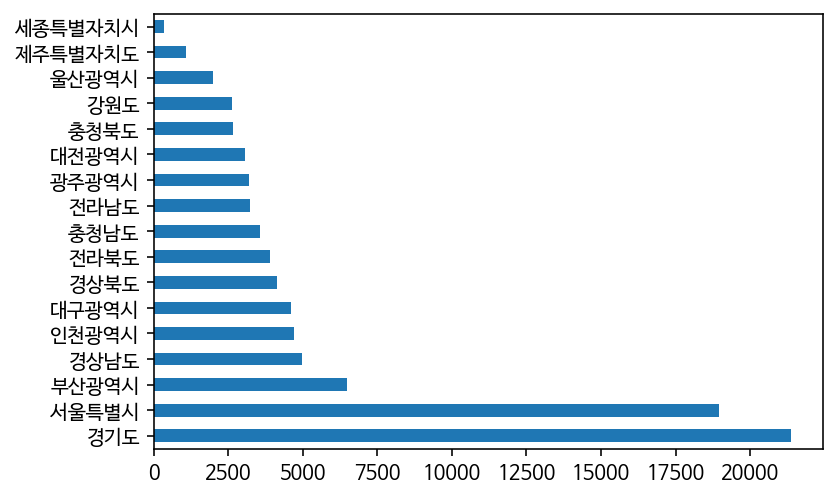

In [31]:
df["시도명"].value_counts().plot.barh()

([<matplotlib.patches.Wedge at 0x7fc9175c87d0>,
 [Text(0.8136110834098681, 0.7402952147303269, '경기도'),
  Text(-0.584297430292072, 0.9319852536140695, '서울특별시'),
  Text(-1.090293644920731, 0.14580729695549247, '부산광역시'),
  Text(-1.0623477869105895, -0.2853369580796935, '경상남도'),
  Text(-0.9095673566367303, -0.6186171867486961, '인천광역시'),
  Text(-0.6671582131246341, -0.8745855696616229, '대구광역시'),
  Text(-0.37703530908774835, -1.0333655576324896, '경상북도'),
  Text(-0.079489451249184, -1.0971241621348533, '전라북도'),
  Text(0.20315684442937762, -1.0810769151922068, '충청남도'),
  Text(0.4492328870845092, -1.0040865566084016, '전라남도'),
  Text(0.6596117727975714, -0.8802910366389318, '광주광역시'),
  Text(0.8336295814932291, -0.7176780063924376, '대전광역시'),
  Text(0.9587293123280153, -0.5392940808900567, '충청북도'),
  Text(1.0410180911737614, -0.3553608501916581, '강원도'),
  Text(1.084328282287467, -0.18501939420371977, '울산광역시'),
  Text(1.0978724090177139, -0.06838255272832329, '제주특별자치도'),
  Text(1.0999182384571349, 

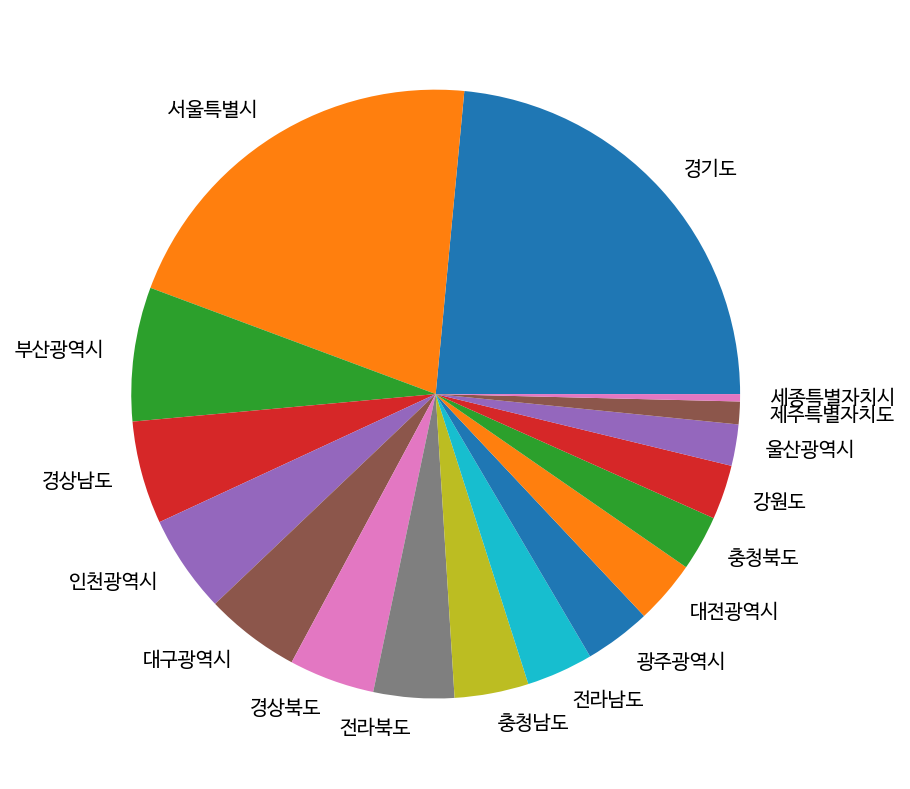

In [27]:
fig  = plt.figure(figsize = (7,7))
plt.pie(x = df['시도명'].value_counts() , 
        labels = df['시도명'].value_counts().index)


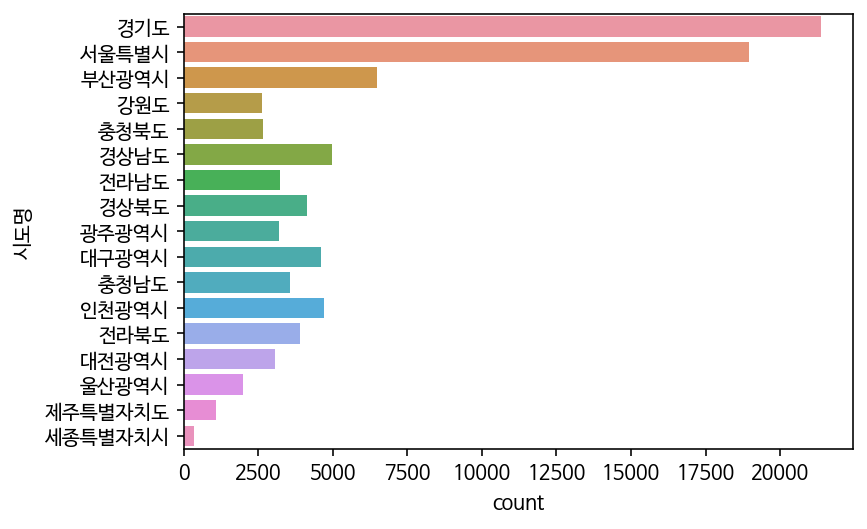

In [32]:
sns.countplot(data=df, y="시도명")

In [ ]:
# "상권업종대분류명"으로 갯수를 세어봅니다.
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [ ]:
# "상권업종중분류명"으로 갯수를 세어봅니다.
df["상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [ ]:
# normalize=True 를 사용해 비율을 구해봅니다.
df["상권업종중분류명"].value_counts(normalize=True)

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

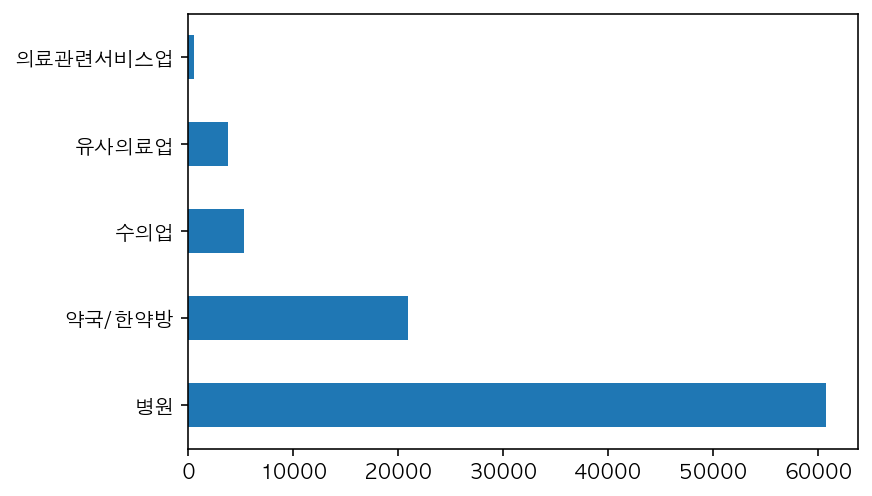

In [ ]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다. 
df["상권업종중분류명"].value_counts().plot.barh()

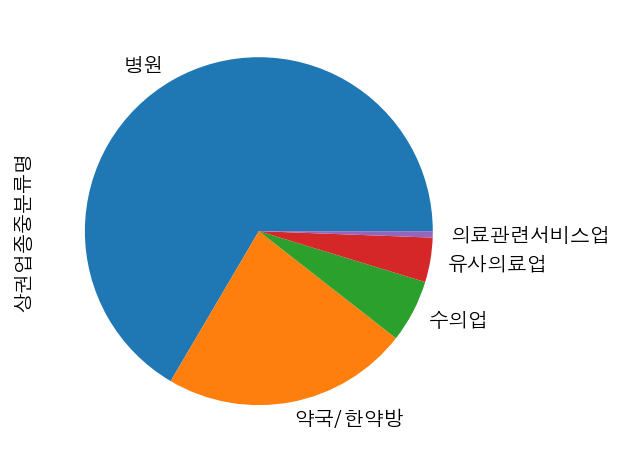

In [ ]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
df["상권업종중분류명"].value_counts().plot.pie()

In [ ]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.
df["상권업종소분류명"].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
수의업-기타         9
접골원            9
제대혈            1
Name: 상권업종소분류명, dtype: int64

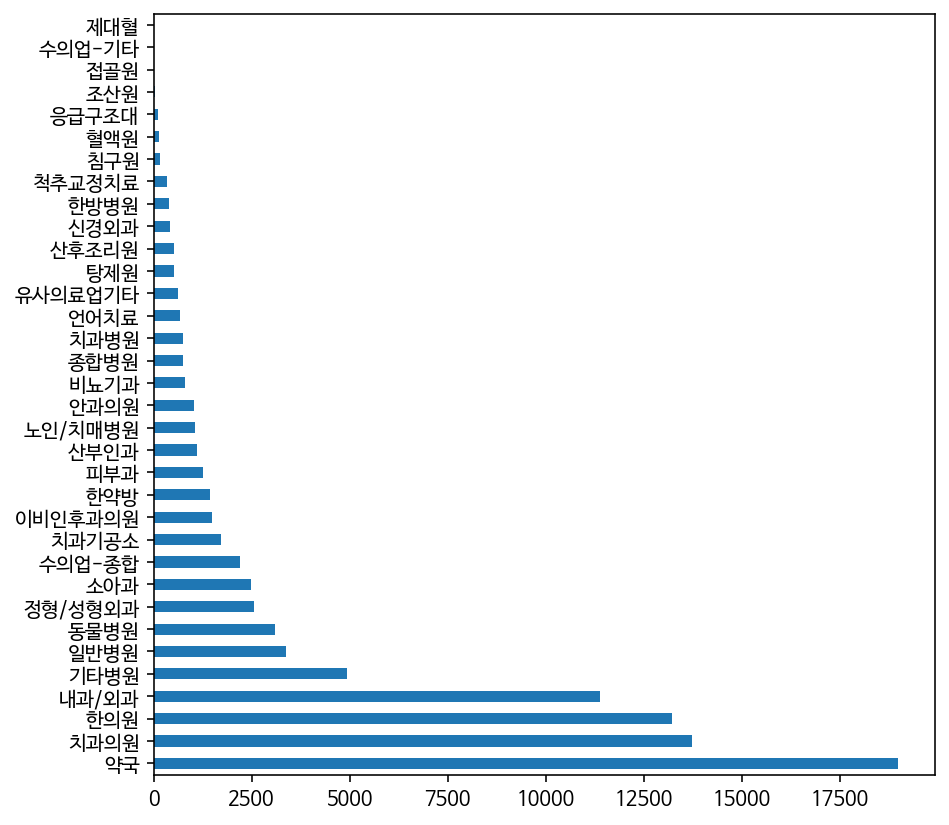

In [33]:
# "상권업종소분류명"으로 갯수를 세어봅니다.
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다. 
df["상권업종소분류명"].value_counts().plot.barh(figsize=(7, 7))

## 데이터 색인하기


* df_medical : 상권업종중분류명이 약국/한약방 

In [35]:
df_medical = df[df['상권업종중분류명'] == '약국/한약방']

In [37]:
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,4.150000e+11,경기도 용인시 수지구 문정로,32,4.150000e+24,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,42.0,강원도,...,강원도 춘천시 중앙로2가 99,4.210000e+11,강원도 춘천시 낙원길,50,4.210000e+24,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,43.0,충청북도,...,충청북도 청주시 상당구 금천동 187-17,4.310000e+11,충청북도 청주시 상당구 중고개로337번길,134,4.310000e+24,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,48.0,경상남도,...,경상남도 합천군 용주면 월평리 78-2,4.890000e+11,경상남도 합천군 용주면 월평길,149,4.890000e+24,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,46.0,전라남도,...,전라남도 영암군 도포면 덕화리 296,4.680000e+11,전라남도 영암군 도포면 인덕길,75,4.680000e+24,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


* "상권업종대분류명" 에서 "의료"인 데이터 , 그 중에서 중분류명 칼럼만   
df.loc['행인덱스  , 열이름']

In [38]:
shop_type = df['상권업종대분류명'] == '의료'
df.loc[shop_type, '상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [39]:
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

In [40]:
# 중분류가 유사의료업인 데이터 
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 30)

In [42]:
# 상호명 
df['상호명'].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [43]:
# 유사의료업에서 상호명 top 10 
df_medi['상호명'].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

In [45]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
df_seoul_drug = df[
                   (df['상권업종소분류명'] == '약국') &
                   (df['시도명'] == '서울특별시')
]
df_seoul_drug.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,1.170000e+11,서울특별시 강남구 테헤란로,101,1.170000e+24,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강동구 둔촌동 630,1.170000e+11,서울특별시 강동구 명일로,172,1.170000e+24,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 중랑구 신내동 646,1.130000e+11,서울특별시 중랑구 신내로,211,1.130000e+24,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 성동구 행당동 346,1.120000e+11,서울특별시 성동구 행당로,82,1.120000e+24,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 동대문구 휘경동 286-121,1.120000e+11,서울특별시 동대문구 망우로18나길,3,1.120000e+24,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349


In [46]:
# 서울의 약국데이터 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다.
df_seoul_drug['시군구명'].value_counts()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: 시군구명, dtype: int64

In [47]:
#비율 
df_seoul_drug['시군구명'].value_counts(normalize =True)

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
강서구     0.037999
마포구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
종로구     0.031014
양천구     0.030455
중구      0.029617
강북구     0.029058
구로구     0.028500
동작구     0.026823
성동구     0.024588
용산구     0.024308
금천구     0.023750
도봉구     0.023470
Name: 시군구명, dtype: float64

In [57]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다

df_seoul_hospital = df[ 
                       (df['상권업종소분류명'] == '종합병원')&
                       (df['시도명'] == '서울특별시')]
df_seoul_hospital.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 광진구 중곡동 58-25,1.120000e+11,서울특별시 광진구 긴고랑로,119,1.120000e+24,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048


In [59]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

In [61]:
# str.contains 를 사용해서 "상호명"에 "대학병원"이 들어가는 것을
df[df['상호명'].str.contains('대학병원')].head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
193,23651380,동국대학병원일산,S,의료,S01,병원,S01B01,종합병원,41.0,경기도,...,경기도 고양시 일산동구 식사동 814,4.130000e+11,경기도 고양시 일산동구 동국로,27,4.130000e+24,경기도 고양시 일산동구 동국로 27,410773.0,10326.0,126.805548,37.676425


In [62]:
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소를
df[df['도로명주소'].str.startswith("서울")].head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11.0,서울특별시,...,서울특별시 강남구 도곡동 467-14,1.170000e+11,서울특별시 강남구 언주로30길,39,1.170000e+24,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강남구 신사동 592-4,1.170000e+11,서울특별시 강남구 논현로,826,1.170000e+24,서울특별시 강남구 논현로 826,135893.0,6025.0,127.028531,37.522223
9,20755460,헬로스마일소아과,S,의료,S01,병원,S01B11,소아과,11.0,서울특별시,...,서울특별시 강남구 논현동 39-18,1.170000e+11,서울특별시 강남구 논현로131길,30,1.170000e+24,서울특별시 강남구 논현로131길 30,135010.0,6045.0,127.027878,37.514144
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,서울특별시 강동구 성내동 9-5,1.170000e+11,서울특별시 강동구 천호대로,1032,1.170000e+24,서울특별시 강동구 천호대로 1032,134030.0,5379.0,127.126507,37.537333
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,1.170000e+11,서울특별시 강남구 테헤란로,101,1.170000e+24,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


### 특정 지역만 보기 

* 서울 지역만

In [83]:
df_seoul = df[df['시도명'] == '서울특별시']
df_seoul.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11.0,서울특별시,...,서울특별시 강남구 도곡동 467-14,1.170000e+11,서울특별시 강남구 언주로30길,39,1.170000e+24,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742


In [84]:
df_seoul.shape

(18943, 30)

: 서울특별시 데이터만 18943개 

In [85]:
# 구별 
df_seoul['시군구명'].value_counts()

강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
강서구      799
노원구      741
은평구      739
영등포구     731
성북구      708
강동구      703
마포구      649
관악구      578
중구       576
양천구      574
서대문구     543
중랑구      497
종로구      492
동작구      489
성동구      482
구로구      451
도봉구      412
강북구      396
용산구      361
금천구      303
Name: 시군구명, dtype: int64

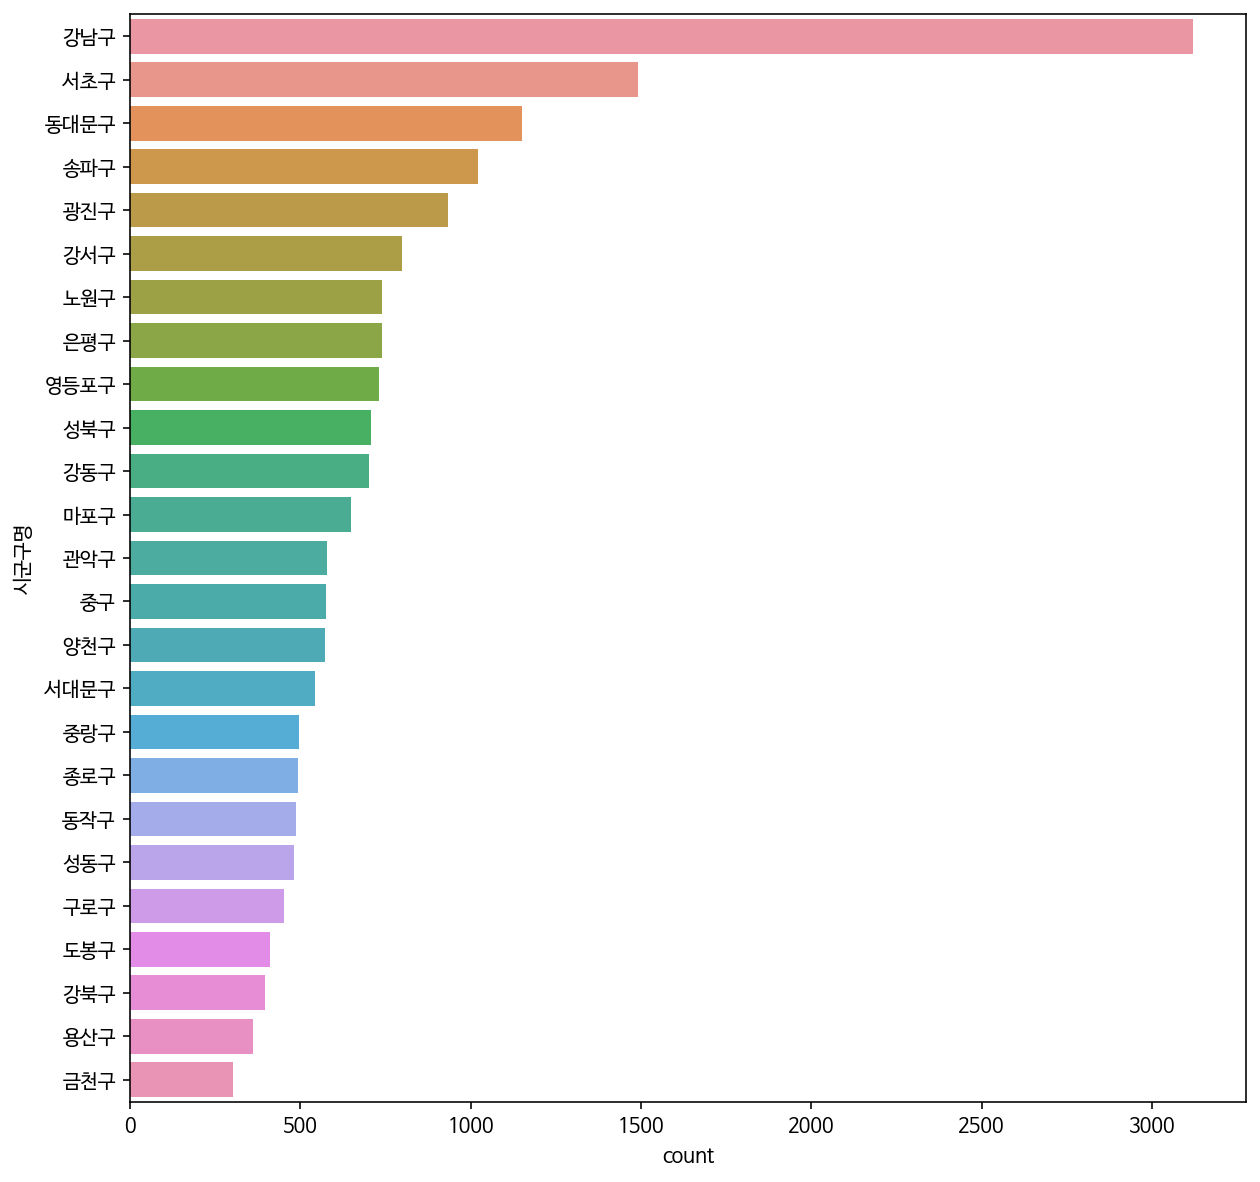

In [91]:
# 시각화 
plt.figure(figsize =(10,10))
sns.countplot(data = df_seoul , y = '시군구명' , order = df_seoul['시군구명'].value_counts().index)

* Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
x = 경도 , y = 위도 

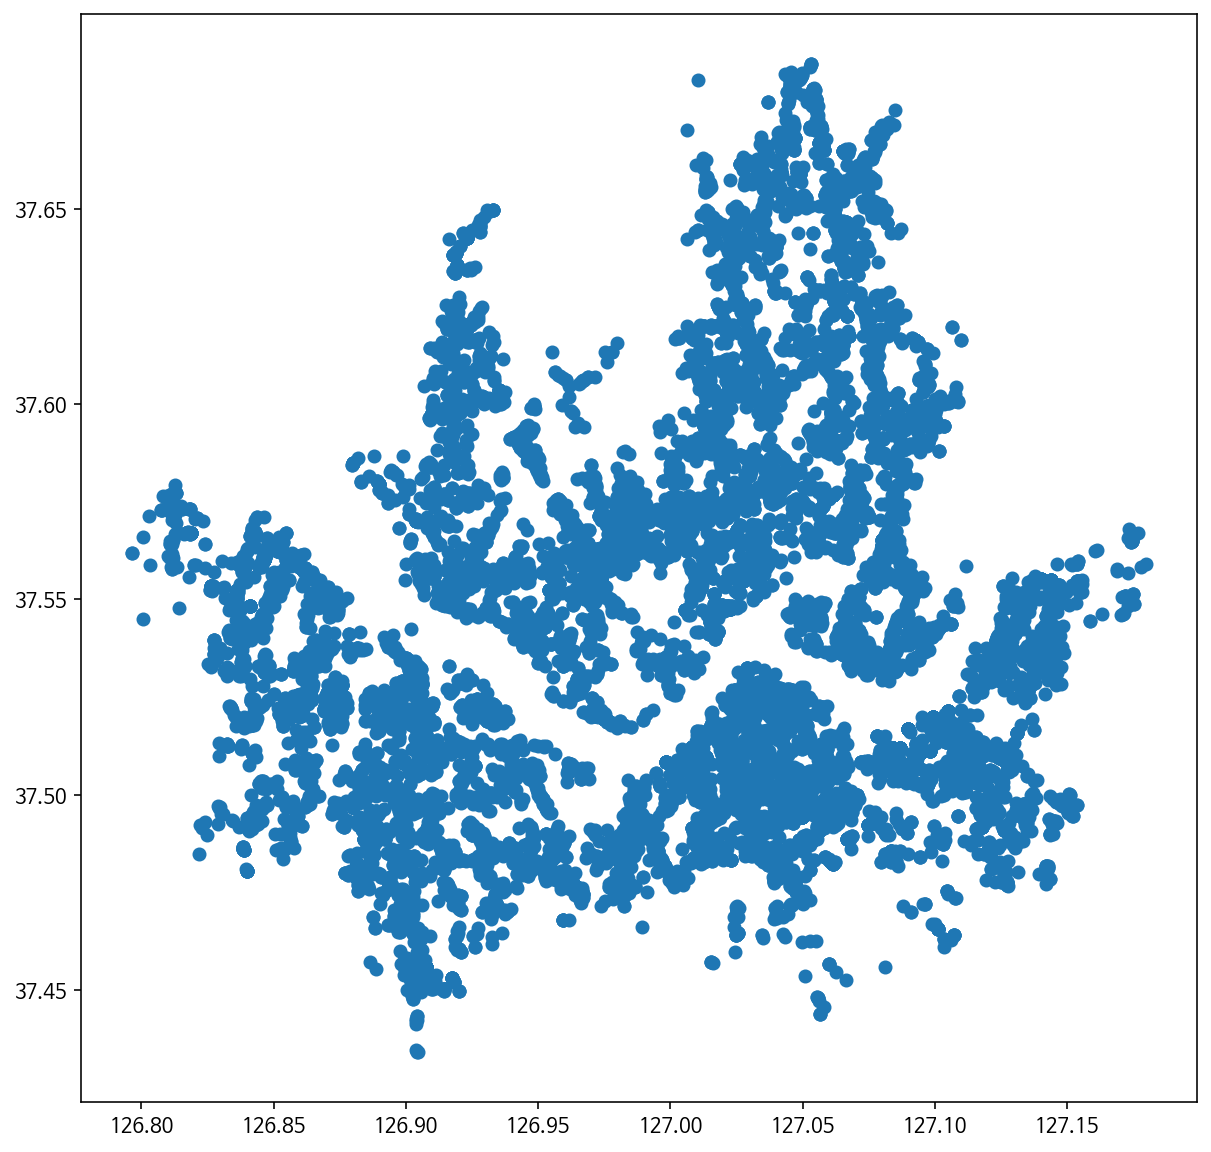

In [93]:
plt.figure(figsize = (10,10))
plt.scatter(data = df_seoul , x = '경도', y = '위도')

* sns.scatterplot( data = , x = , y= , hue = '추가로 표현할  정보')   
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

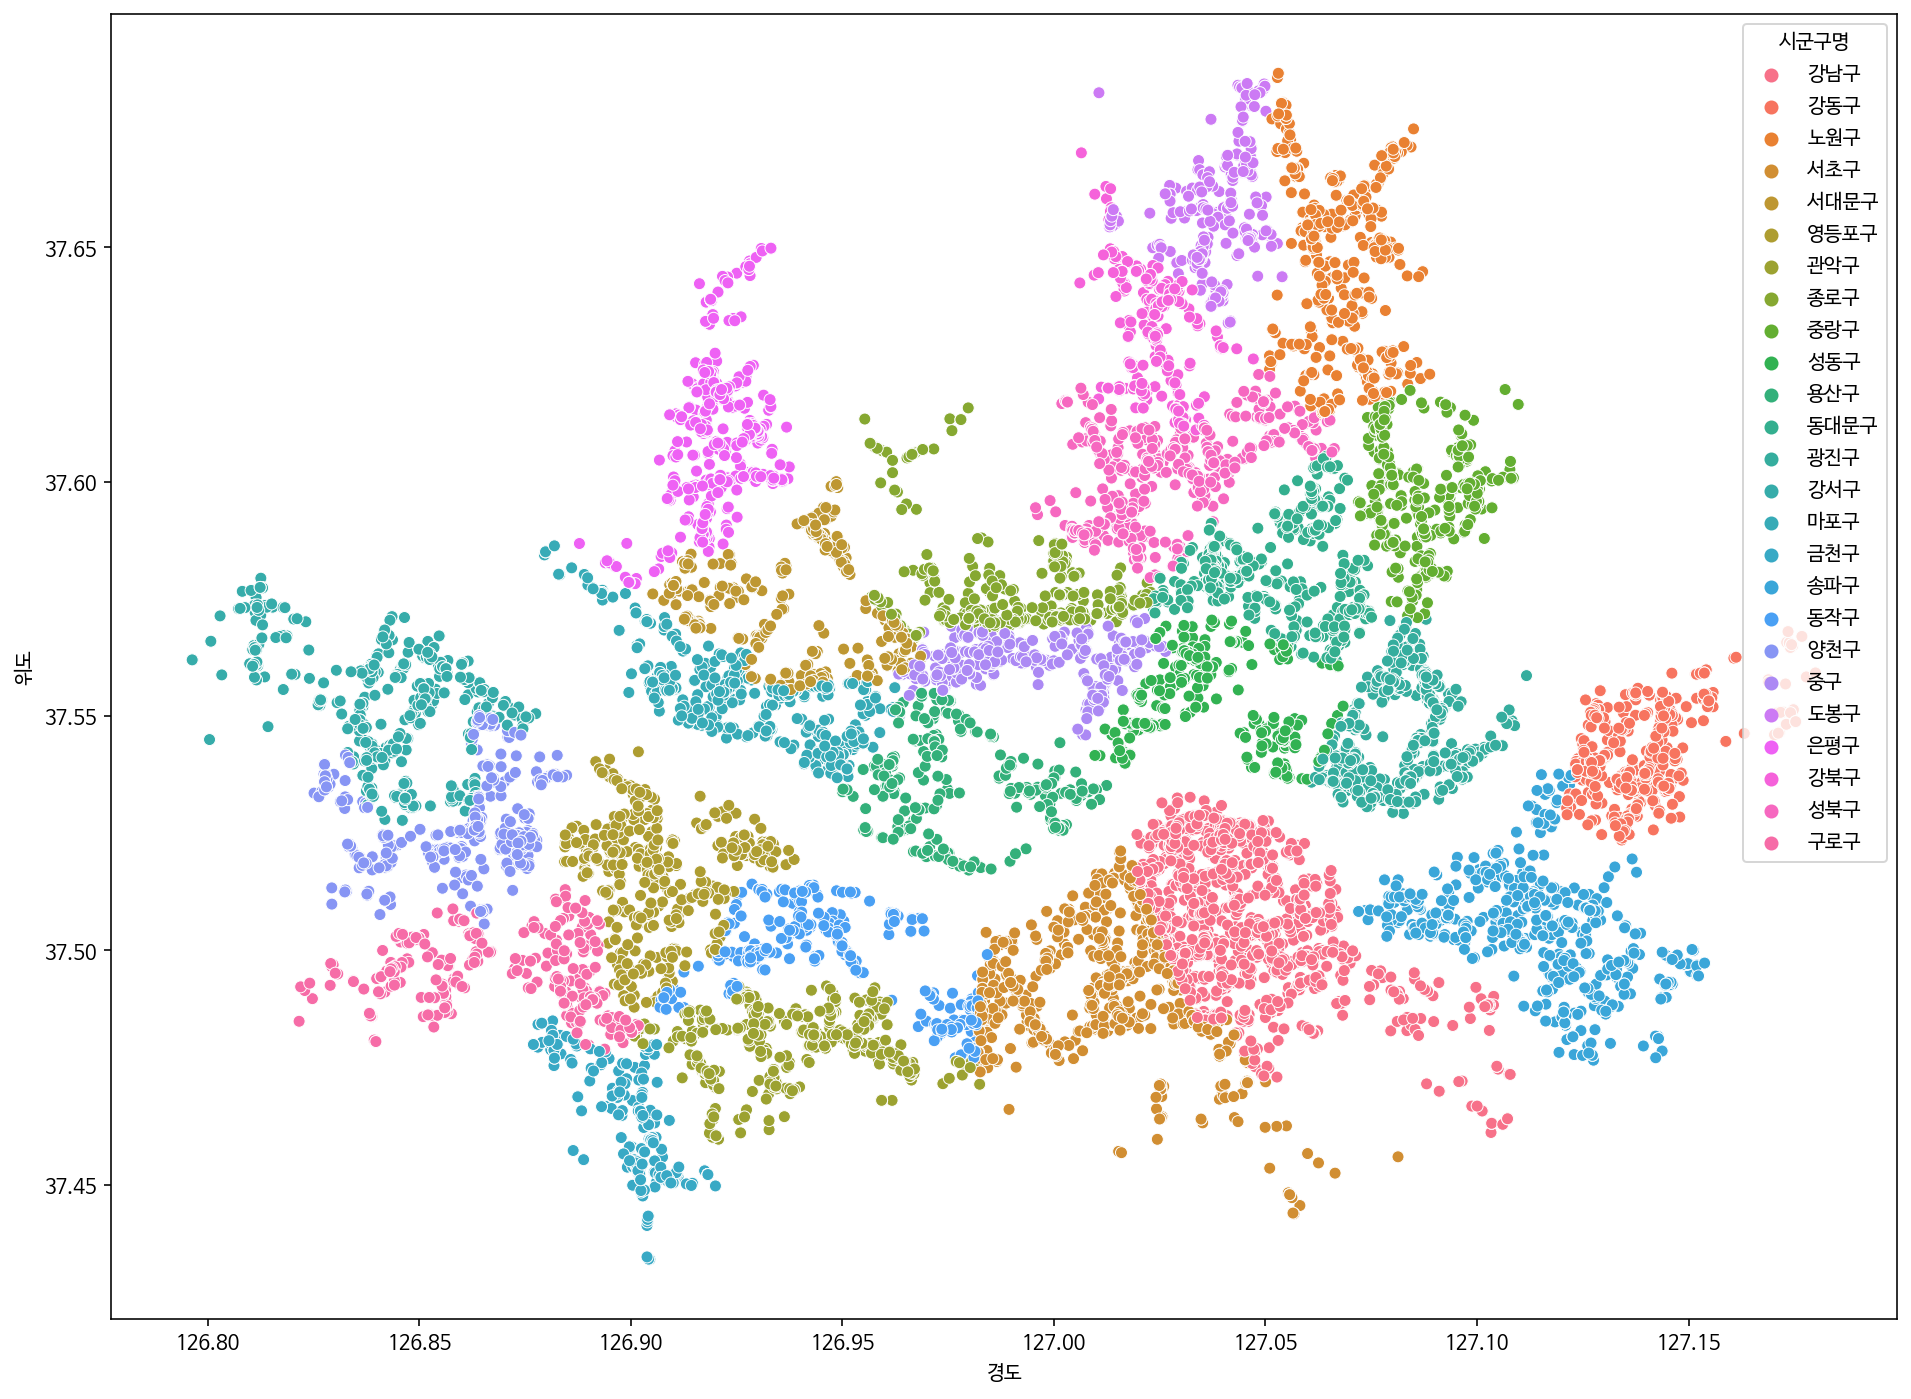

In [94]:
# 시군구별로 색깔을 다르게 표시
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul, 
                x='경도', y='위도', hue='시군구명')

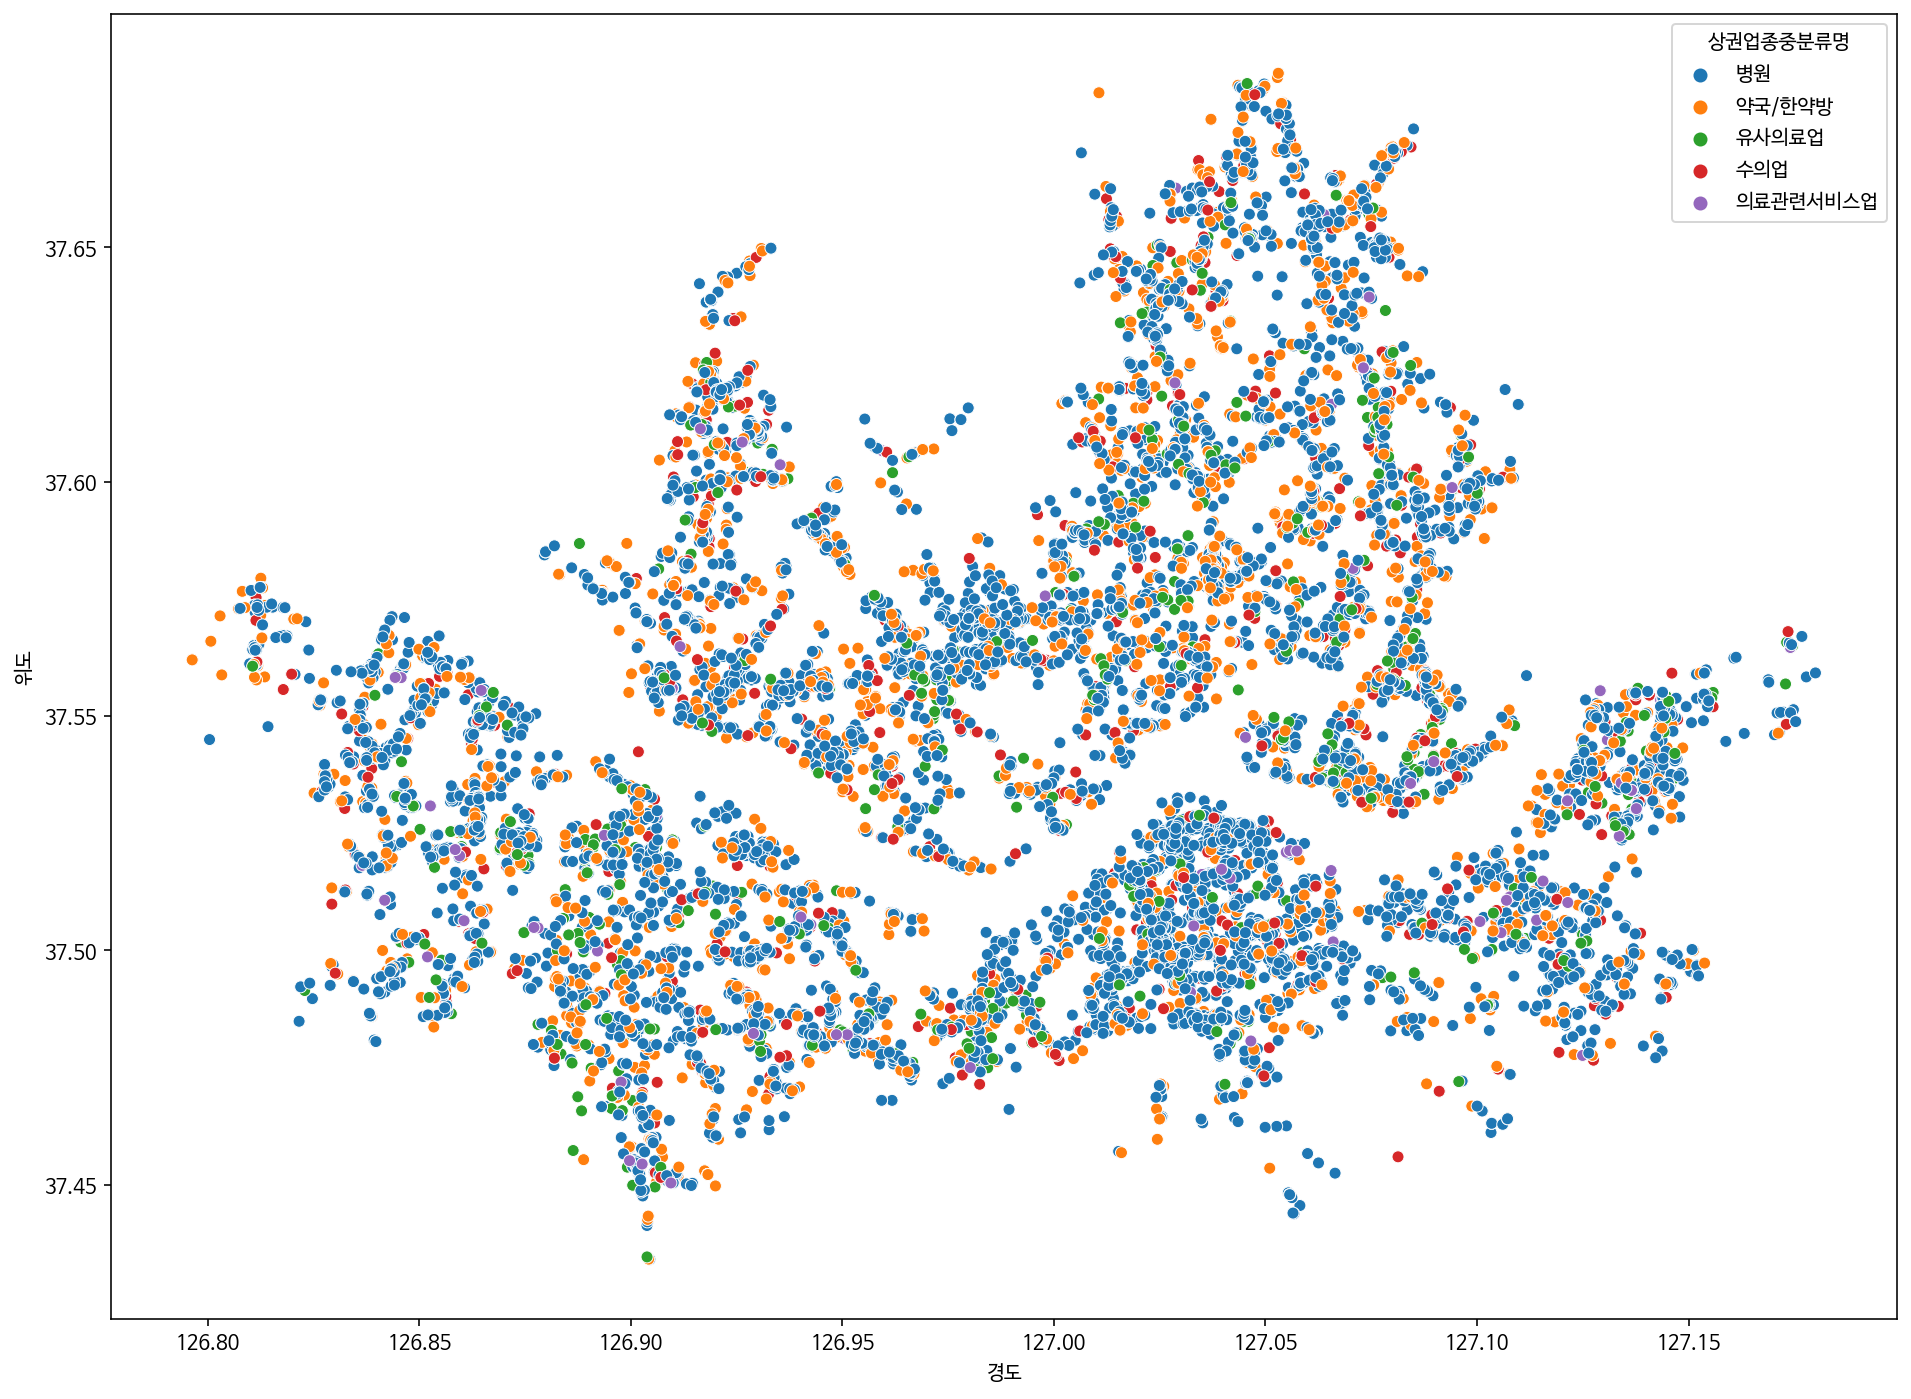

In [95]:
# 경도, 위도 산점도에 상권업종중분류명 정보를 추가 
plt.figure(figsize= (16,12))
sns.scatterplot(data = df_seoul, 
                x= '경도', y= '위도' , hue = '상권업종중분류명')

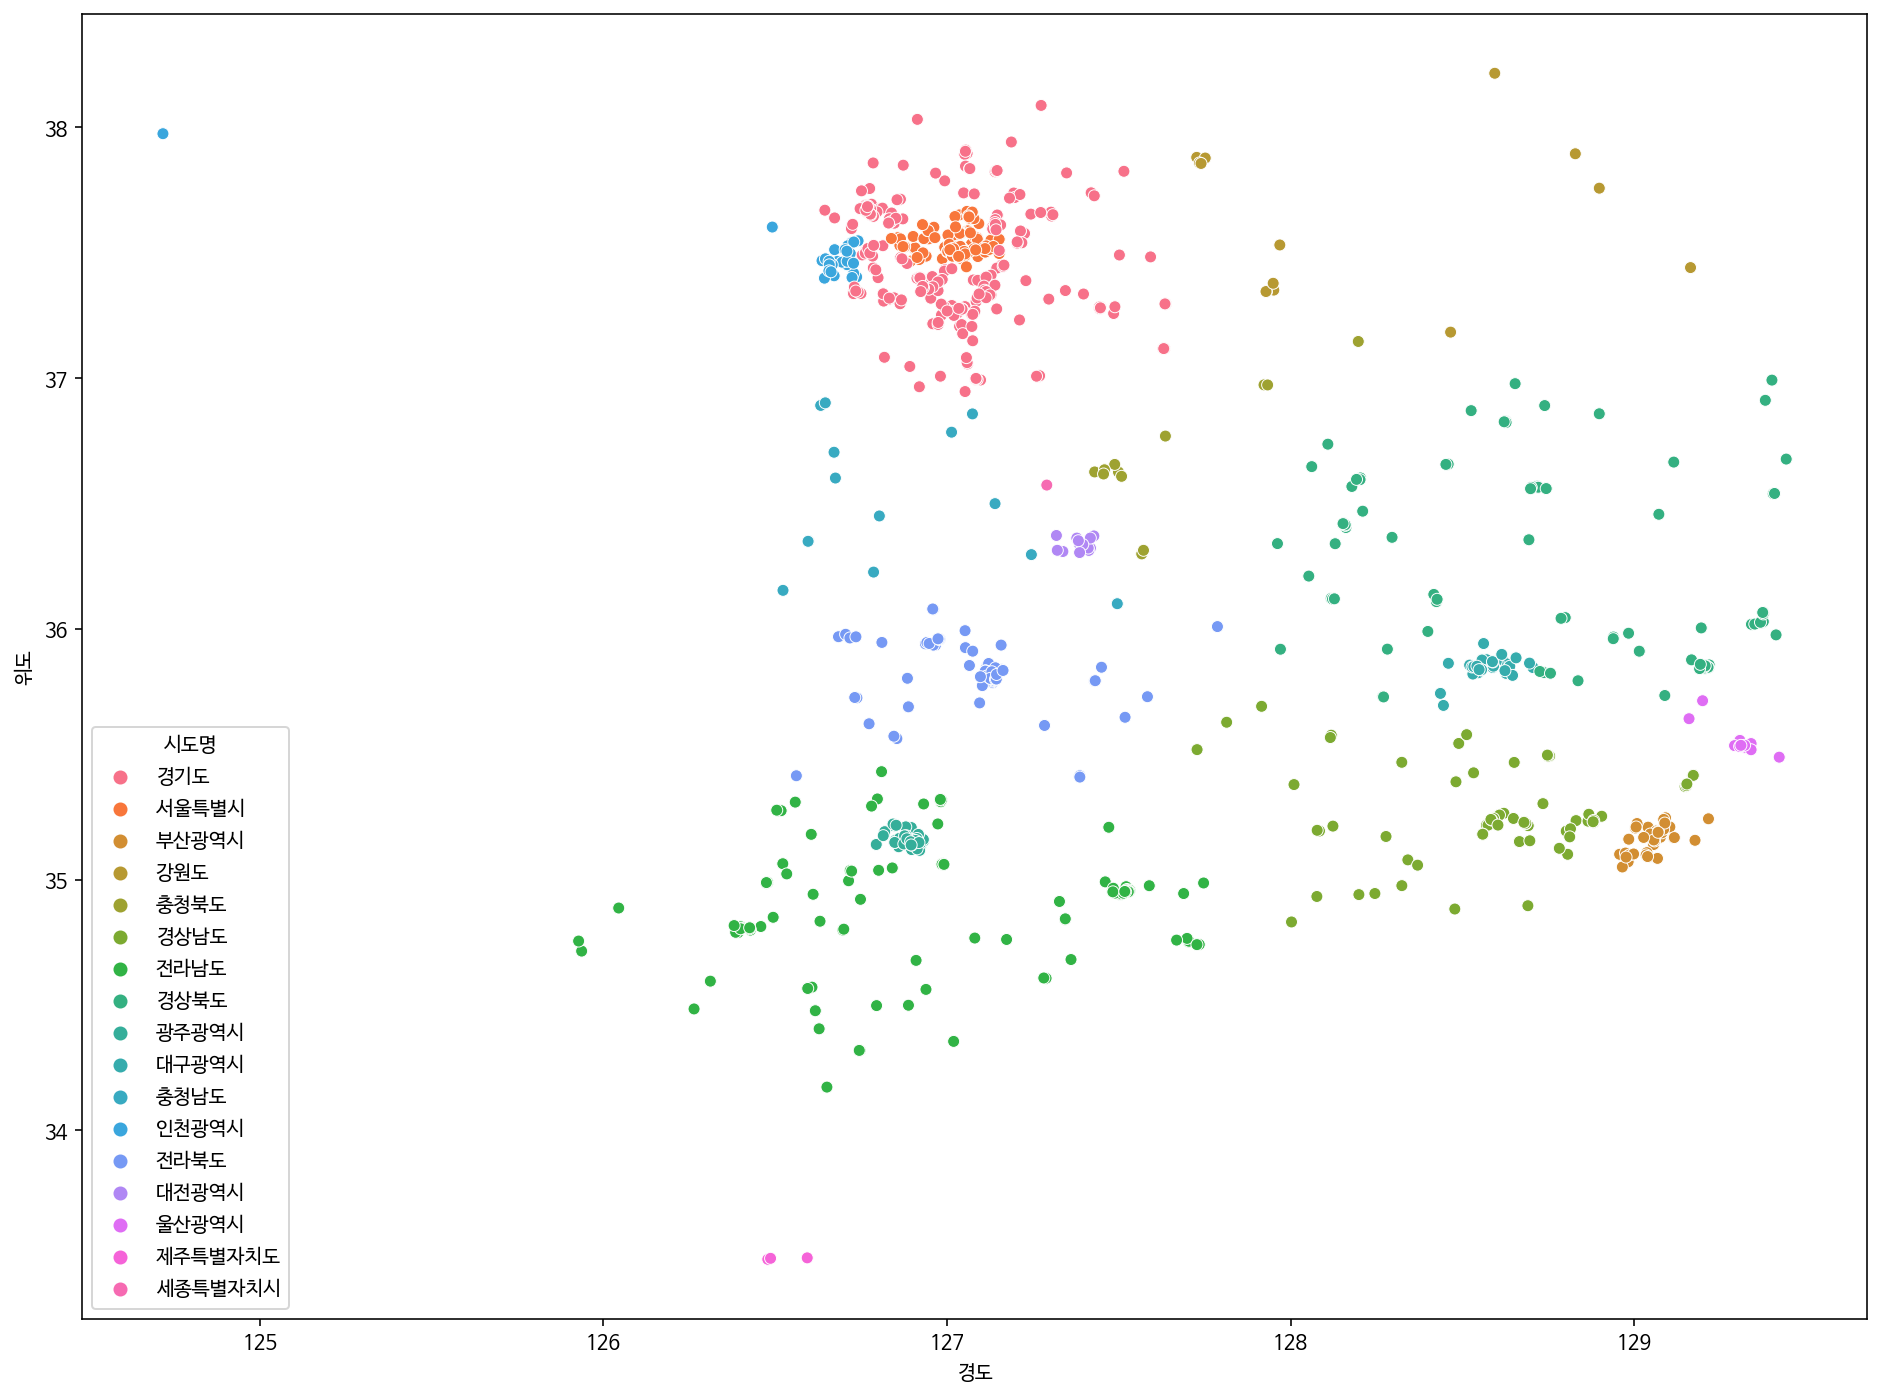

In [97]:
# 전국 데이터 산점도 
plt.figure(figsize =(16,12))
sns.scatterplot(data = df[:1000] , x= '경도', y ='위도', hue = '시도명')

## 지도 시각화 Folium

In [98]:
import folium

* 서울시 , 상권업종소분류명이 종합병원인 데이터 geo_df

In [99]:
geo_df = df_seoul_hospital 

In [105]:
geo_df['상권업종소분류명'].unique()

array(['종합병원'], dtype=object)

* 지도 생성 

In [101]:
# 지도 생성을 위해 중심 좌표 구하기 
lat_c = geo_df['위도'].mean()
print('서울시 종합병원 데이터 중심 위도:' , lat_c)
lng_c = geo_df['경도'].mean()
print('서울시 종합병원 데이터 중심 경도:', lng_c)

서울시 종합병원 데이터 중심 위도: 37.54244715615384
서울시 종합병원 데이터 중심 경도: 127.00850537362635


In [102]:
# 지도 생성 
map = folium.Map(
    location = [lat_c, lng_c], # 중심좌표 : 서울시 중심
    tiles = 'Stamen Terrain',           # 지도 모양 
    zoom_start = 12) 


In [103]:
# 지도에 병원 정보 표시 
for i in geo_df.index : 
  lat = geo_df.loc[i, '위도']
  lng = geo_df.loc[i, '경도']
  # 상호명 + 주소 
  popup_name = geo_df.loc[i,'상호명'] + "-" + geo_df.loc[i, '도로명주소']

  folium.Marker(location = [lat, lng],
                popup = popup_name).add_to(map)

In [104]:
map

* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석을 해보세요.
* 예시) 
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?